In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, Markdown


In [2]:
# Dictionary to store tracked products with price trends
# Example: {'url1': {'name': 'Product A', 'prices': [(timestamp, price)]}}
tracked_products = {}


In [3]:
# Function to fetch product details from a URL
def fetch_product_details(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")
    
    try:
        # Example for Amazon: Update selectors for other websites
        name = soup.find("span", {"id": "productTitle"}).get_text(strip=True)
        price = soup.find("span", {"class": "a-price-whole"}).get_text(strip=True)
        price = float(price.replace(",", ""))
    except AttributeError:
        return None, None
    return name, price


In [4]:
# Function to add or update product details in the dictionary
def add_or_update_product(url):
    name, price = fetch_product_details(url)
    if name and price:
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        if url in tracked_products:
            old_price = tracked_products[url]['prices'][-1][1]  # Get the latest price
            if old_price != price:
                display(Markdown(f"### Price updated for {name}: ₹{old_price} → ₹{price}"))
            tracked_products[url]['prices'].append((timestamp, price))  # Add new price
        else:
            display(Markdown(f"### Adding new product: {name} at ₹{price}"))
            tracked_products[url] = {'name': name, 'prices': [(timestamp, price)]}
    else:
        display(Markdown("### Failed to fetch product details. Check the URL."))


In [5]:
# Function to visualize price trends for a specific product
def visualize_price_trend(url):
    if url in tracked_products:
        product = tracked_products[url]
        timestamps, prices = zip(*product['prices'])  # Extract timestamps and prices
        
        # Plot the price trend
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, prices, marker='o', label=f"{product['name']} Price Trend")
        plt.xlabel('Timestamp', fontsize=12)
        plt.ylabel('Price (₹)', fontsize=12)
        plt.title(f"Price Trend for {product['name']}", fontsize=14)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        display(Markdown("### Product not found in tracked products."))


In [6]:
# Function to display all tracked products
def list_tracked_products():
    if tracked_products:
        display(Markdown("### Tracked Products:"))
        for url, details in tracked_products.items():
            display(Markdown(f"- **{details['name']}** - ₹{details['prices'][-1][1]} (Latest Price)\n  [Product Link]({url})"))
    else:
        display(Markdown("### No products are currently being tracked."))



Options:
1. Add/Update a Product
2. List Tracked Products
3. Visualize Price Trend
4. Exit
Enter your choice: 3
Enter the product URL to visualize: https://www.amazon.in/boAt-Rockerz-255-Pro-Earphones/dp/B08TV2P1N8?_encoding=UTF8&content-id=amzn1.sym.82b20790-8877-4d70-8f73-9d8246e460aa&dib=eyJ2IjoiMSJ9.V6MNwpISQh-6-eHWBmP-H70qyEHMg3CG3GjA47URHIjJYOZcMtDXtAjFxOaMZwFfxnGujwKczvgkcQNgphN7_oxDZYiXkXuuTZcQhmOPIwTscK1CJFhatXSK7Zht56zUhoQIHWcb_GJPade38Rh7sp2T59idvqz7FF3_AQDUtSxczyhhTpkRDrv5ZpEBrtQ7QblBoC4sTXZDqe1YWv69nmmXlT1tKLnL8ycrN4iveqxDQPSIgtJUdPlj76rJaLdxAZ-6EO1AO9wjYqf5RUuWFvhb4Tk_IH0TSnlmY2rvkJrj8-37DBV8tJXOS7tseI8ie97wQRd7PhuY4hgWXVZaPK1Ydhb3B6DPJbT6fNPdsGM.3WaxYaP5ayIWrZUI-WSOF9xoq4fFZdgXUSV0Suto6xQ&dib_tag=se&pd_rd_r=2a9ecdc8-0bb9-4791-9085-f7d2cac23cf0&pd_rd_w=LMqWt&pd_rd_wg=3CgGr&pf_rd_p=82b20790-8877-4d70-8f73-9d8246e460aa&pf_rd_r=ZZM6HKSRVKRB19K5M561&qid=1736280218&refinements=p_89%3AboAt&s=electronics&sr=1-1


### Product not found in tracked products.


Options:
1. Add/Update a Product
2. List Tracked Products
3. Visualize Price Trend
4. Exit
Enter your choice: 1
Enter the product URL: https://www.amazon.in/boAt-Rockerz-255-Pro-Earphones/dp/B08TV2P1N8?_encoding=UTF8&content-id=amzn1.sym.82b20790-8877-4d70-8f73-9d8246e460aa&dib=eyJ2IjoiMSJ9.V6MNwpISQh-6-eHWBmP-H70qyEHMg3CG3GjA47URHIjJYOZcMtDXtAjFxOaMZwFfxnGujwKczvgkcQNgphN7_oxDZYiXkXuuTZcQhmOPIwTscK1CJFhatXSK7Zht56zUhoQIHWcb_GJPade38Rh7sp2T59idvqz7FF3_AQDUtSxczyhhTpkRDrv5ZpEBrtQ7QblBoC4sTXZDqe1YWv69nmmXlT1tKLnL8ycrN4iveqxDQPSIgtJUdPlj76rJaLdxAZ-6EO1AO9wjYqf5RUuWFvhb4Tk_IH0TSnlmY2rvkJrj8-37DBV8tJXOS7tseI8ie97wQRd7PhuY4hgWXVZaPK1Ydhb3B6DPJbT6fNPdsGM.3WaxYaP5ayIWrZUI-WSOF9xoq4fFZdgXUSV0Suto6xQ&dib_tag=se&pd_rd_r=2a9ecdc8-0bb9-4791-9085-f7d2cac23cf0&pd_rd_w=LMqWt&pd_rd_wg=3CgGr&pf_rd_p=82b20790-8877-4d70-8f73-9d8246e460aa&pf_rd_r=ZZM6HKSRVKRB19K5M561&qid=1736280218&refinements=p_89%3AboAt&s=electronics&sr=1-1&th=1


### Adding new product: boAt Rockerz 255 Pro+, 60HRS Battery, Fast Charge, IPX7, Dual Pairing, Low Latency, Magnetic Earbuds, Bluetooth Neckband, Wireless with Mic Earphones (Active Black) at ₹999.0


Options:
1. Add/Update a Product
2. List Tracked Products
3. Visualize Price Trend
4. Exit
Enter your choice: 3
Enter the product URL to visualize: https://www.amazon.in/boAt-Rockerz-255-Pro-Earphones/dp/B08TV2P1N8?_encoding=UTF8&content-id=amzn1.sym.82b20790-8877-4d70-8f73-9d8246e460aa&dib=eyJ2IjoiMSJ9.V6MNwpISQh-6-eHWBmP-H70qyEHMg3CG3GjA47URHIjJYOZcMtDXtAjFxOaMZwFfxnGujwKczvgkcQNgphN7_oxDZYiXkXuuTZcQhmOPIwTscK1CJFhatXSK7Zht56zUhoQIHWcb_GJPade38Rh7sp2T59idvqz7FF3_AQDUtSxczyhhTpkRDrv5ZpEBrtQ7QblBoC4sTXZDqe1YWv69nmmXlT1tKLnL8ycrN4iveqxDQPSIgtJUdPlj76rJaLdxAZ-6EO1AO9wjYqf5RUuWFvhb4Tk_IH0TSnlmY2rvkJrj8-37DBV8tJXOS7tseI8ie97wQRd7PhuY4hgWXVZaPK1Ydhb3B6DPJbT6fNPdsGM.3WaxYaP5ayIWrZUI-WSOF9xoq4fFZdgXUSV0Suto6xQ&dib_tag=se&pd_rd_r=2a9ecdc8-0bb9-4791-9085-f7d2cac23cf0&pd_rd_w=LMqWt&pd_rd_wg=3CgGr&pf_rd_p=82b20790-8877-4d70-8f73-9d8246e460aa&pf_rd_r=ZZM6HKSRVKRB19K5M561&qid=1736280218&refinements=p_89%3AboAt&s=electronics&sr=1-1&th=1


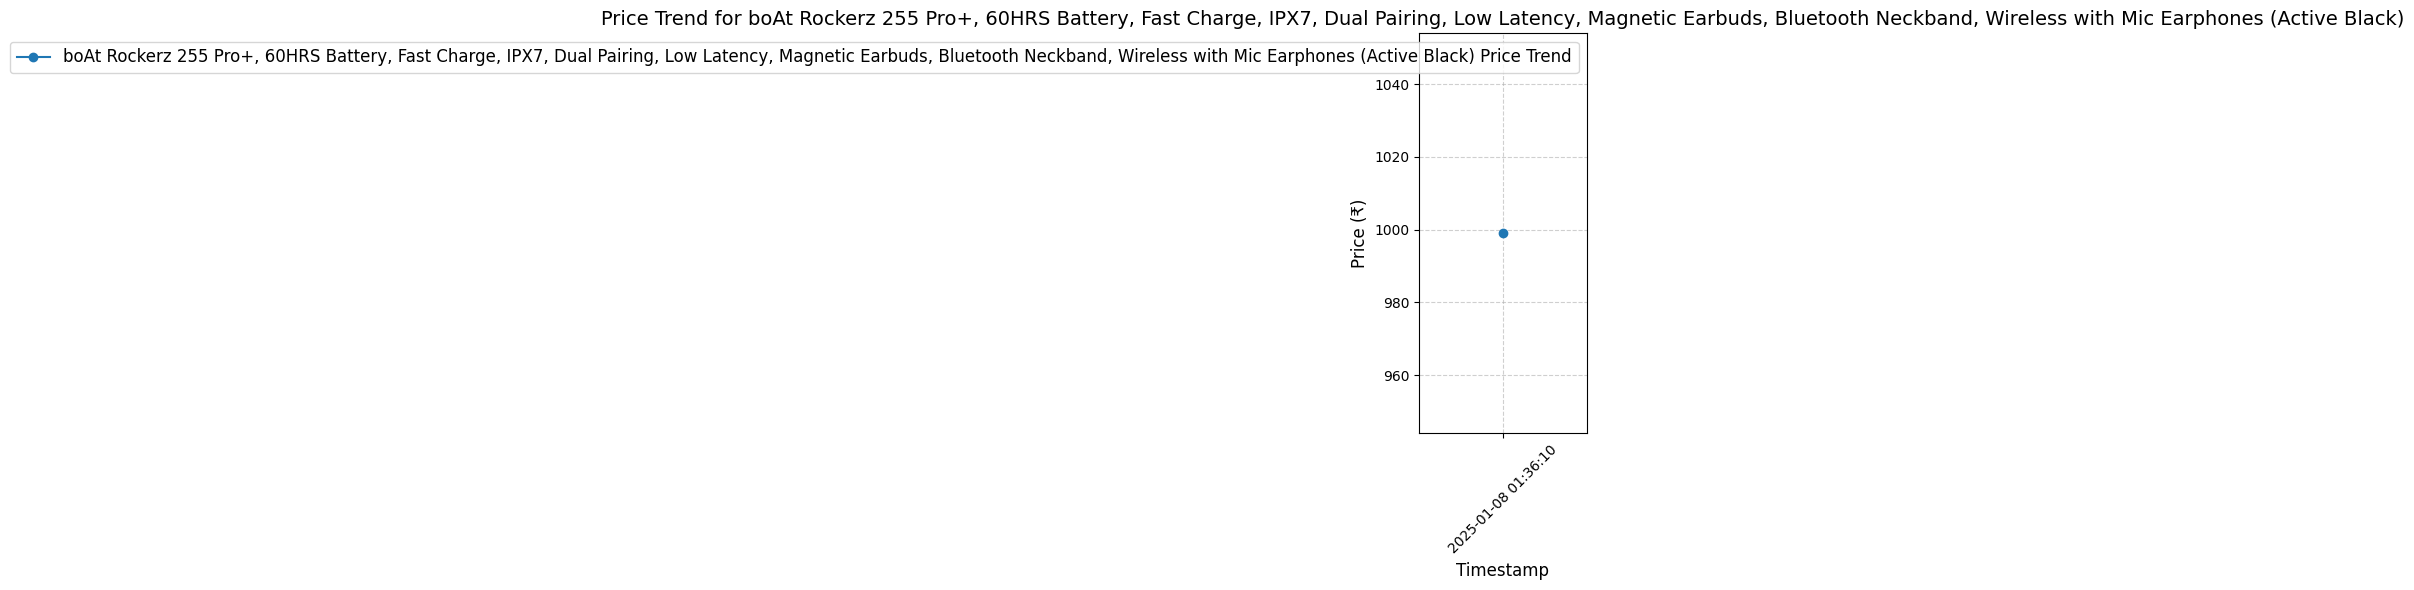


Options:
1. Add/Update a Product
2. List Tracked Products
3. Visualize Price Trend
4. Exit


In [ ]:
# Interactive command-line interface
while True:
    print("\nOptions:")
    print("1. Add/Update a Product")
    print("2. List Tracked Products")
    print("3. Visualize Price Trend")
    print("4. Exit")
    choice = input("Enter your choice: ").strip()
    
    if choice == "1":
        product_url = input("Enter the product URL: ").strip()
        add_or_update_product(product_url)
    elif choice == "2":
        list_tracked_products()
    elif choice == "3":
        product_url = input("Enter the product URL to visualize: ").strip()
        visualize_price_trend(product_url)
    elif choice == "4":
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please try again.")
